In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use("seaborn")

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true = true.assign(true = 1)
fake = fake.assign(true = 0)
combined = true.append(fake)
combined.tail()

,title,text,subject,date,true
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [5]:
len(combined["subject"].unique())

8

We have 8 unique values for subject:

In [6]:
combined["subject"].unique()

array(['politicsNews', 'worldnews', 'News', 'politics', 'Government News',
       'left-news', 'US_News', 'Middle-east'], dtype=object)

In [7]:
combined[combined["true"] == 0]["subject"].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [8]:
combined[combined["true"] == 1]["subject"].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [9]:
combined.groupby("true")["subject"].unique().value_counts()

[News, politics, Government News, left-news, US_News, Middle-east]    1
[politicsNews, worldnews]                                             1
Name: subject, dtype: int64

In [55]:
print(xticks0)

['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


In [10]:
def compute_width(column, true):
    
    length = len(combined[combined["true"] == true][column].unique())
    width = [i for i in range(1, length + 1)]
    
    return width

In [69]:
mylist = [i for i in range(1,len(xtick_labels0) +1)]
print(mylist)

[1, 2, 3, 4, 5, 6]


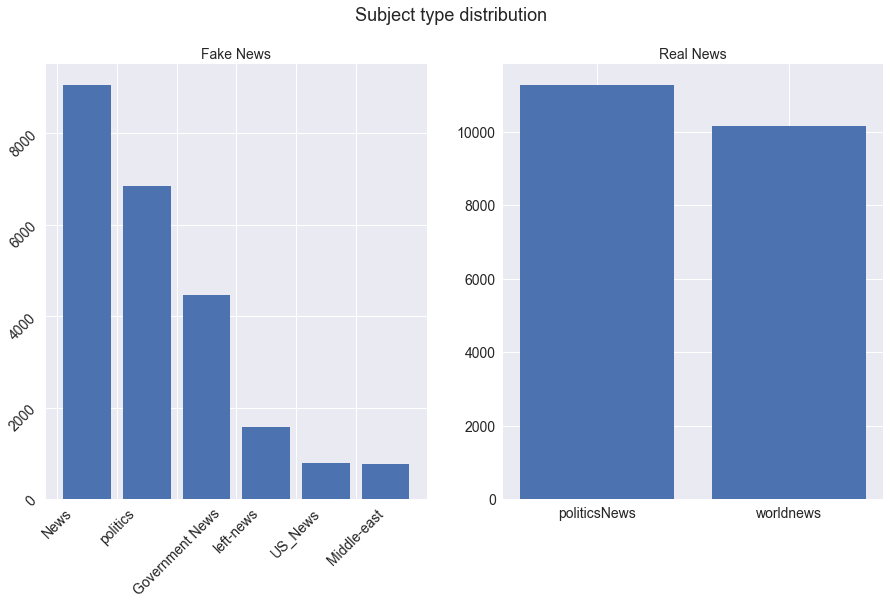

In [82]:
fig = plt.figure(figsize = (15,8))

ax0 = fig.add_subplot(121)
width0 = compute_width("subject", 0)

xtick_labels0 = combined[combined["true"] == 0]["subject"].unique()
# Shift ticks to the left for 45° label directionrotation.
xticks0 = [i-0.5 for i in range(1,len(xtick_labels0) +1)]

ax0.bar(width0, combined[combined["true"] == 0]["subject"].value_counts())


ax1 = fig.add_subplot(122)
width1 = compute_width("subject",1)

xtick_labels1 = combined[combined["true"] == 1]["subject"].unique()
xticks1 = [i for i in range(1,len(xtick_labels1) +1)]

ax1.bar(width1, combined[combined["true"] == 1]["subject"].value_counts())

ax0.set_xticks(xticks0)
ax0.set_xticklabels(xtick_labels0)

ax1.set_xticks(xticks1)
ax1.set_xticklabels(xtick_labels1)

ax0.tick_params(labelsize = 14, labelrotation = 45)
ax1.tick_params(labelsize = 14)

ax0.set_title("Fake News", fontsize = 14)
ax1.set_title("Real News", fontsize = 14)
fig.suptitle("Subject type distribution", fontsize = 18)

plt.show()

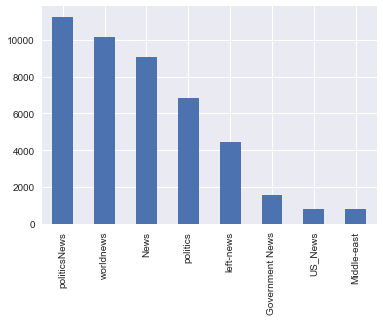

In [52]:
combined["subject"].value_counts().plot(kind="bar")

In [12]:
combined.dtypes

title      object
text       object
subject    object
date       object
true        int64
dtype: object

In [13]:
type(combined["text"])

pandas.core.series.Series

In [14]:
combined.reset_index(drop = True, inplace=True)

In [15]:
len(combined.loc[0,"text"])

4659

In [16]:
combined["text_length"] = combined["text"]
combined["text_length"] = combined["text_length"].apply(lambda x: len(x))
combined.head()

,title,text,subject,date,true,text_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,4659
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,4077
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,2789
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,2461
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,5204


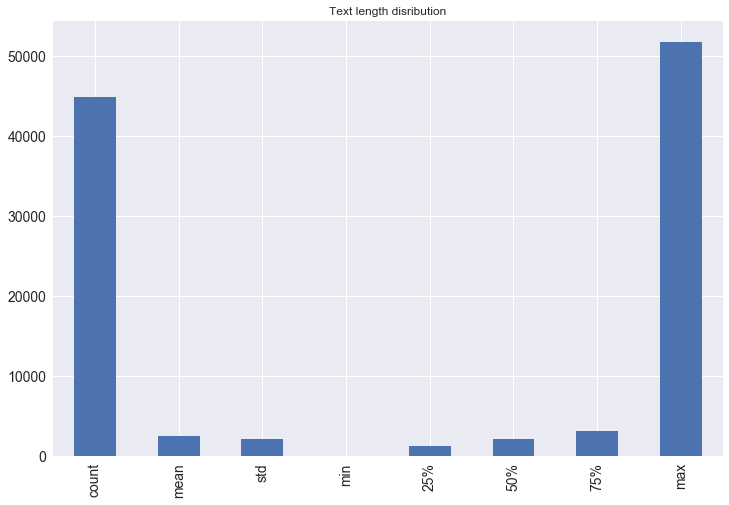

In [48]:
combined["text_length"].describe().plot(kind="bar", figsize = (12,8), fontsize=14, title = "Text length disribution")

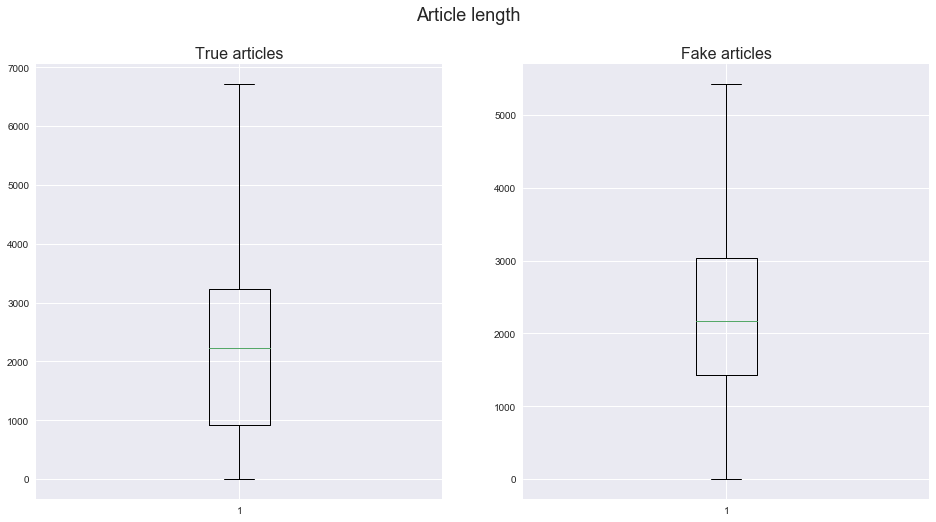

In [38]:
fig = plt.figure(figsize = (16,8))

ax1 = fig.add_subplot(121)
ax1.boxplot(combined[combined["true"] == 1]["text_length"], showfliers = False)

ax2 = fig.add_subplot(122)
ax2.boxplot(combined[combined["true"] == 0]["text_length"],showfliers = False)

ax1.set_title("True articles", fontsize = 16)
ax2.set_title("Fake articles", fontsize = 16)
fig.suptitle("Article length", fontsize = 18)


plt.show()